In [325]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


plt.style.use("seaborn-v0_8")

In [ ]:
ticker = "PETR4.SA"
df = yf.download(ticker, period="10y", interval="1d")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2016-02-19,1.188262,1.217569,1.172277,1.198919,56031000
2016-02-22,1.342789,1.342789,1.233555,1.244212,80150300
2016-02-23,1.310818,1.406732,1.284176,1.318811,85037400
2016-02-24,1.297497,1.313482,1.238883,1.270854,75039700
2016-02-25,1.302826,1.353447,1.276183,1.281512,70393700


In [327]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
DatetimeIndex: 2493 entries, 2016-02-19 to 2026-02-19
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, PETR4.SA)   2493 non-null   float64
 1   (High, PETR4.SA)    2493 non-null   float64
 2   (Low, PETR4.SA)     2493 non-null   float64
 3   (Open, PETR4.SA)    2493 non-null   float64
 4   (Volume, PETR4.SA)  2493 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 116.9 KB


Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
count,2493.000000,2493.000000,2493.000000,2493.000000,2.493000e+03
mean,13.297116,13.465020,13.131400,13.299036,5.763051e+07
std,10.340790,10.431516,10.250006,10.338098,3.382376e+07
min,1.188262,1.217569,1.172277,1.198919,0.000000e+00
25%,5.341855,5.427481,5.243272,5.321228,3.567590e+07
50%,8.167230,8.287571,8.086658,8.186821,5.044700e+07
75%,21.423403,21.756234,21.178879,21.532085,6.999190e+07
max,38.080002,38.580002,37.689999,38.049999,4.902304e+08


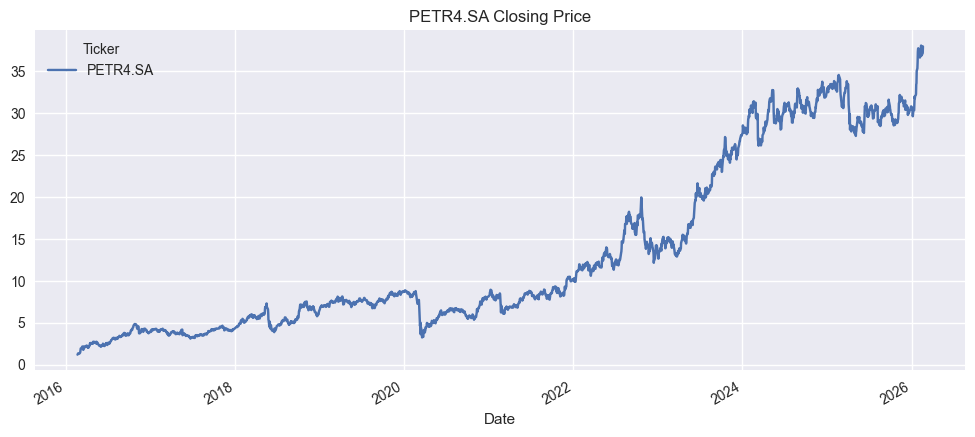

In [328]:
df["Close"].plot(title=f"{ticker} Closing Price", figsize=(12,5))
plt.show()


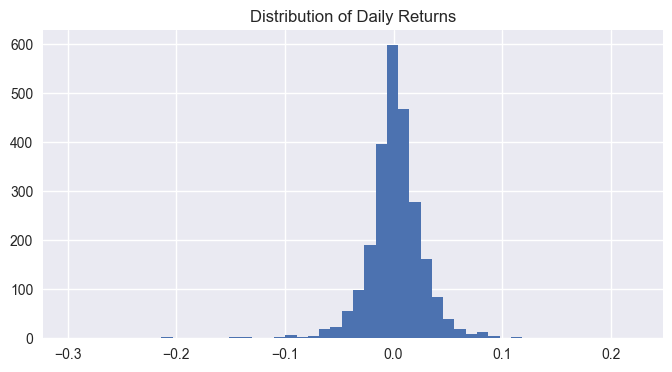

In [329]:
df["return"] = df["Close"].pct_change()
df["return"].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Daily Returns")
plt.show()


In [ ]:
# Features
df["ma5"] = df["Close"].rolling(window=5).mean()
df["ma10"] = df["Close"].rolling(window=10).mean()
df["vol_change"] = df["Volume"].pct_change()
df["gap"] = (df["Open"] - df["Close"].shift(1)) / df["Close"].shift(1)



In [331]:
df["target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df[["Close", "target"]].head(10)


Price,Close,target
Ticker,PETR4.SA,
Date,,
2016-02-19,1.188262,1
2016-02-22,1.342789,0
2016-02-23,1.310818,0
2016-02-24,1.297497,1
2016-02-25,1.302826,0
2016-02-26,1.297497,1
2016-02-29,1.369432,1
2016-03-01,1.414724,1


In [ ]:
# Clean data
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,return,ma5,ma10,vol_change,gap,target
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,,,,,,
Date,,,,,,,,,,,
2016-03-03,1.750422,1.750422,1.750422,1.750422,186772500,0.162832,1.467477,1.377958,1.109332,1.628318e-01,1
2016-03-04,1.923599,2.104769,1.750422,1.750422,175922100,0.098934,1.592698,1.451491,-0.058094,-3.145694e-07,1
2016-03-07,1.963563,2.006191,1.851664,1.931592,85041400,0.020776,1.711524,1.513569,-0.516596,4.155200e-03,1
2016-03-08,1.990206,2.088783,1.886299,1.963563,137169400,0.013569,1.826620,1.581507,0.612972,3.084521e-08,1
2016-03-09,2.024841,2.072798,1.960899,2.051484,84821900,0.017403,1.930526,1.654242,-0.381627,3.078999e-02,1


In [333]:
features = ["return", "ma5", "ma10", "vol_change", "gap"]
target = "target"

X = df[features]
y = df[target]

print(X.shape, y.shape)

X.head()


(2474, 5) (2474,)


Price,return,ma5,ma10,vol_change,gap
Ticker,,,,,
Date,,,,,
2016-03-03,0.162832,1.467477,1.377958,1.109332,1.628318e-01
2016-03-04,0.098934,1.592698,1.451491,-0.058094,-3.145694e-07
2016-03-07,0.020776,1.711524,1.513569,-0.516596,4.155200e-03
2016-03-08,0.013569,1.826620,1.581507,0.612972,3.084521e-08
2016-03-09,0.017403,1.930526,1.654242,-0.381627,3.078999e-02


In [ ]:
#Separating training data from test data 80/20
split_index = int(len(df) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 1979
Test size: 495


In [ ]:
model = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=50,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)




In [ ]:

def predict(train, test, features, model):
    if len(test) == 0:
        return pd.DataFrame()

    model.fit(train[features], train["target"])
    pred_proba = model.predict_proba(test[features])[:, 1]
    preds = (pred_proba >= 0.5).astype(int)
    preds = pd.Series(preds, index=test.index, name="prediction")
    
    return pd.concat([test["target"], preds], axis=1)


def walk_forward_backtest(data, model, features, start=1500, step=250):
    all_predictions = []

    for i in range(start, len(data), step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:i+step].copy()
        
        if len(test) == 0:
            continue

        preds = predict(train, test, features, model)
        if len(preds) > 0:
            all_predictions.append(preds)

    if len(all_predictions) == 0:
        return pd.DataFrame()
    
    return pd.concat(all_predictions)

wf_predictions = walk_forward_backtest(df, model, features, start=1500, step=250)
wf_predictions.head()




,target,prediction
Date,,
2022-03-28,1,1
2022-03-29,1,0
2022-03-30,1,0
2022-03-31,0,1
2022-04-01,0,0


In [ ]:
# Evaluate walk-forward backtest performance
if len(wf_predictions) > 0:
    y_true = wf_predictions["target"]
    y_pred = wf_predictions["prediction"]
    
    print("Walk-Forward Backtest Metrics:")
    print(f"Total predictions: {len(wf_predictions)}")
    
    actual_ups = (y_true == 1).sum()
    actual_downs = (y_true == 0).sum()
    pred_ups = (y_pred == 1).sum()
    pred_downs = (y_pred == 0).sum()
    
    print(f"\nActual: Ups = {actual_ups}, Downs = {actual_downs}")
    print(f"Predicted: Ups = {pred_ups}, Downs = {pred_downs}")
    print(f"\nAccuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    
    baseline_acc = accuracy_score(y_true, [1] * len(y_true))
    print(f"\nBaseline (always up) accuracy: {baseline_acc:.4f}")
else:
    print("No predictions available from walk-forward backtest")


Walk-Forward Backtest Metrics:
Total predictions: 974

Actual: Ups = 522, Downs = 452
Predicted: Ups = 137, Downs = 837

Accuracy: 0.4897
Precision: 0.5912

Baseline (always up) accuracy: 0.5359
